# DATS 6501 - Capstone Project - PUBG Finish Placement Prediction
### By Zhaoyang Chen

### Introduction 
>* PlayerUnknown’s BattleGrounds(PUBG), the Battle Royale-Style video game has taken the world by storm. 100 players are dropped onto an island empty-handed and must explore, scavenge, and eliminate other players until only one is left and standing, and all while the play zone continuous to shrink. The purpose of this project is to demonstrate exploratory data analysis (EDA) on a complex dataset, apply different feature engineering techniques, and predict target variable (Win Placement Percent) by building models. EDA was focused on the following variables: number of kills, total damage dealt, distance travelled, number of medical items used and other important features of the game. A random forest model was built and tuned to predict the win placement percent. The metric used for this project to measure model performance is Mean Absolute Error.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

In [2]:
# import data
data= pd.read_csv('/Users/Zhaoyang/Desktop/Capstone_Project/train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


#### Data Dictionary
>* Id - Player’s Id
>* groupId - Integer ID to identify a group within a match. 
>* matchID - Integer ID to identify match. 
>* assists - Number of enemy players this player damaged that were killed by teammates.
>* boosts - Number of boost items used.
>* damageDealt - Total damage dealt. 
>* DBNOs - Number of enemy players knocked.
>* headshotKills - Number of enemy players killed with headshots.
>* heals - Number of healing items used.
>* killPlace - Ranking in match of number of enemy players killed.
>* killPoints - Kills-based external ranking of player. 
>* kills - Number of enemy players killed.
>* killStreaks - Max number of enemy players killed in a short amount of time.
>* longestKill - Longest distance between player and player killed at time of death. 
>* maxPlace - Worst placement we have data for in the match. 
>* numGroups - Number of groups we have data for in the match.
>* matchDuration - Duration of match in seconds
>* matchType - String identifying the game mode that the data comes from
>* rankPoints - Elo-like ranking of player.
>* revives - Number of times this player revived teammates.
>* rideDistance - Total distance traveled in vehicles measured in meters.
>* roadKills - Number of kills while in a vehicle.
>* swimDistance - Total distance traveled by swimming measured in meters.
>* teamKills - Number of times this player killed a teammate.
>* vehicleDestroys - Number of vehicles destroyed.
>* walkDistance - Total distance traveled on foot measured in meters.
>* weaponsAcquired - Number of weapons picked up.
>* winPoints - Win-based external ranking of player. 
>* winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. 

In [3]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
# get dimension of our dataset
data.shape
# there are 4446966 players in the dataset, eash player has 29 variables

(4446966, 29)

## Data Preprocessing

### 1). Dealing With Missing Values

In [5]:
# let's check the number of missing values for each variable
data.isnull().sum()
# result looks pretty clean, there is only one missing value for the target variable

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [6]:
# let's take a look at the row that has the missing value
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [7]:
# it seems that this player is the only one in the match, we will drop this record
data.drop(2744604, inplace=True)
#now the data is clean
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


## Exploratory Data Analysis

### 1). The Killers and Damage Dealt

In [8]:
# let's first explore the 'kills' variable since it might be the most important feature in our dataset
kills_mean = data.kills.mean()
kills_max = data.kills.max()
kills_median = data.kills.median()
kills_99_quantile = data.kills.quantile(0.99)
print("The average kills of a player is: {}".format(kills_mean))
print("The median of kills is: {}".format(kills_median))
print("The maximum kills recoreded is: {}".format(kills_max))
print("99% of the players have kills less than: {}".format(kills_99_quantile))


The average kills of a player is: 0.9247835321393355
The median of kills is: 0.0
The maximum kills recoreded is: 72
99% of the players have kills less than: 7.0


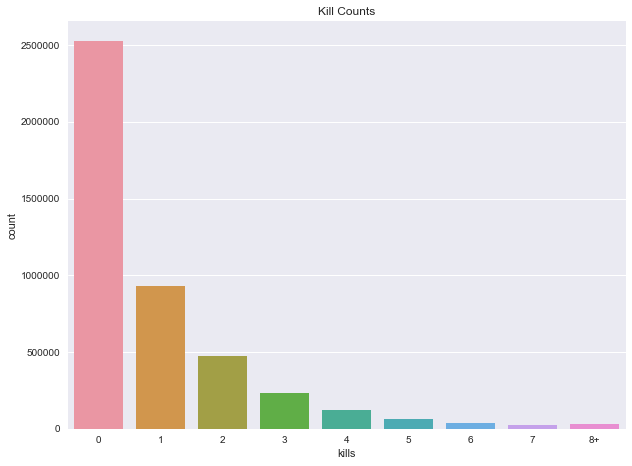

In [9]:
# since 99% of the players have kills less than 7, let's group those players who has kills greater than 7, and make a plot
data_copy = data.copy()
data_copy.loc[data_copy['kills'] > data_copy['kills'].quantile(0.99)] = "8+"
plt.figure(figsize=(10,7.5))
sns.countplot(data_copy['kills'].astype('str').sort_values())
plt.title("Kill Counts")
plt.show()

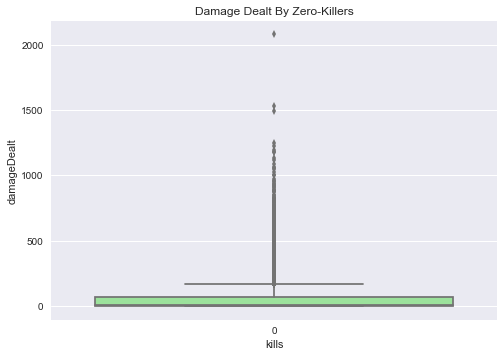

In [10]:
# according to the graph, more than half of the players couldn't make a single kill
# so let's make a box plot for the zero_killers to see if they have made some damages
data_copy = data.copy()
data_copy = data_copy[data_copy['kills']==0]
sns.boxplot(data_copy.kills, data_copy.damageDealt, color = "lightgreen")
plt.title("Damage Dealt By Zero-Killers")
plt.show()

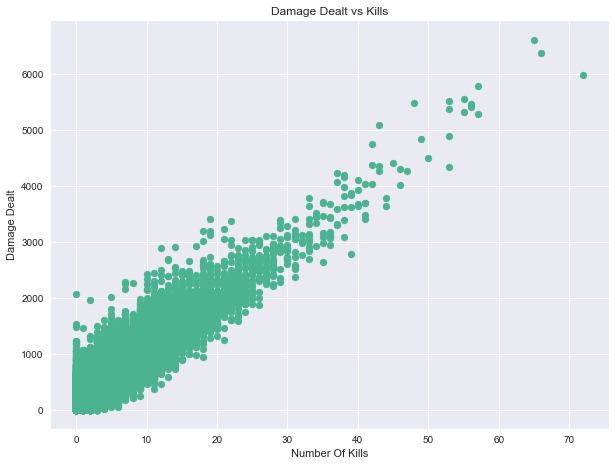

In [11]:
# the above plot shows that the 25th, 50th, 75th percentiles are just a little above 0, maximum damage is about 200.
# now let's explore the damage dealt by all the players in a scatterplot
plt.figure(figsize=(10,7.5))
plt.scatter(x = data['kills'], y = data['damageDealt'], color='#4CB391')
plt.title("Damage Dealt vs Kills")
plt.xlabel("Number Of Kills")
plt.ylabel("Damage Dealt")
plt.show()

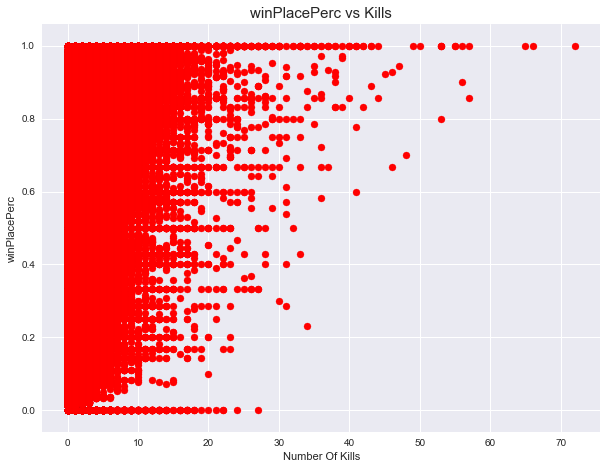

In [12]:
# now it is pretty clear that "kills" and "damageDealt" have a positive relationship

# next let's analyze their relationship to the target variable 'winPlacePerc'
plt.figure(figsize=(10,7.5))
plt.scatter(x = data['kills'], y = data['winPlacePerc'], color='r')
plt.title("winPlacePerc vs Kills", fontsize=15)
plt.xlabel("Number Of Kills")
plt.ylabel("winPlacePerc")
plt.show()

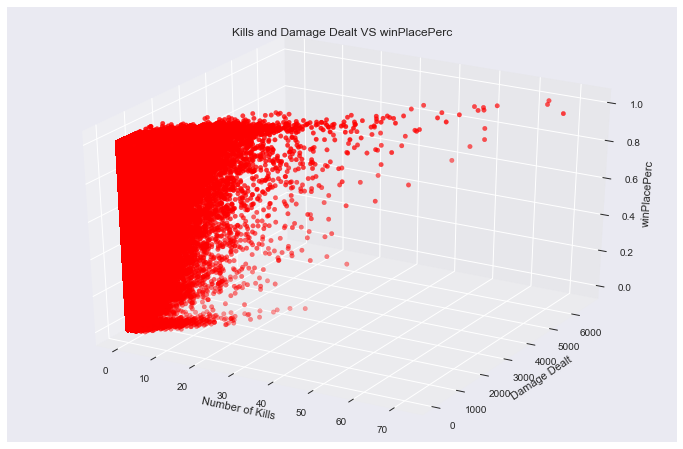

In [13]:
# make a 3D plot to show the relationship betwenn kills and damage VS winplacePerc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x = data['kills']
y = data['damageDealt']
z = data['winPlacePerc']

ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Number of Kills')
ax.set_ylabel('Damage Dealt')
ax.set_zlabel('winPlacePerc')
ax.set_title('Kills and Damage Dealt VS winPlacePerc')

plt.show()

In [14]:
# according to the 3D scatter plot above, we have verified that both 'kills' and 'damageDealt' have a strong positive relationship to winPlacePerc
# now let's take a look at other variables

### 2). Heals and Boosts (Medical Items) Analysis

In [15]:
# number of heal and boost items used is another important factor in PUBG game
# since they are both medical items, we will analyze them together

# let's first take a look at the variable 'heal'
heals_mean = data.heals.mean()
heals_max = data.heals.max()
heals_median = data.heals.median()
heals_99_quantile = data.heals.quantile(0.99)
print("The average healing items used by a player is: {}".format(heals_mean))
print("The median of healing items used is: {}".format(heals_median))
print("The maximum healing items used recoreded is: {}".format(heals_max))
print("99% of the players have used healing items less than: {}".format(heals_99_quantile))

The average healing items used by a player is: 1.3701475050961722
The median of healing items used is: 0.0
The maximum healing items used recoreded is: 80
99% of the players have used healing items less than: 12.0


In [16]:
# next let's take a look at the variable 'boosts'
boosts_mean = data.boosts.mean()
boosts_max = data.boosts.max()
boosts_median = data.boosts.median()
boosts_99_quantile = data.boosts.quantile(0.99)
print("The average boosting items used by a player is: {}".format(boosts_mean))
print("The median of boosting items used is: {}".format(boosts_median))
print("The maximum boosting items used recoreded is: {}".format(boosts_max))
print("99% of the players have used boosting items less than: {}".format(boosts_99_quantile))

The average boosting items used by a player is: 1.1069079698176172
The median of boosting items used is: 0.0
The maximum boosting items used recoreded is: 33
99% of the players have used boosting items less than: 7.0


/Users/Zhaoyang/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


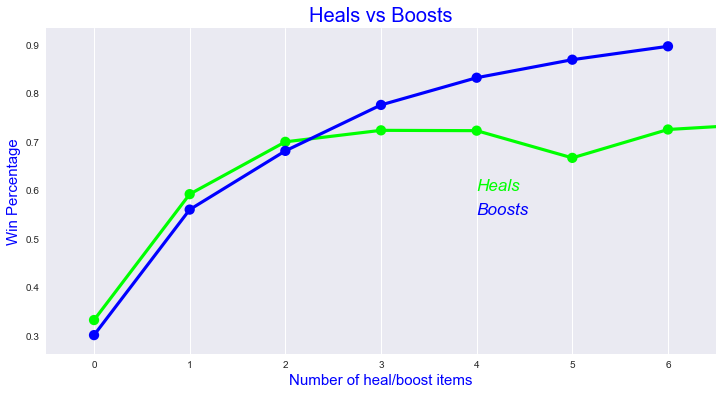

In [17]:
# let's see if they have a positive impact on the target variable
data_copy = data.copy()
data_copy = data_copy[data_copy['heals'] < data_copy['heals'].quantile(0.99)]
data_copy = data_copy[data_copy['boosts'] < data_copy['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(12,6))
sns.pointplot(x='heals',y='winPlacePerc',data=data_copy,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data_copy,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [18]:
# the plot shows that as the number of medical items used increases, boost item does a more positive influence 
# than heal item

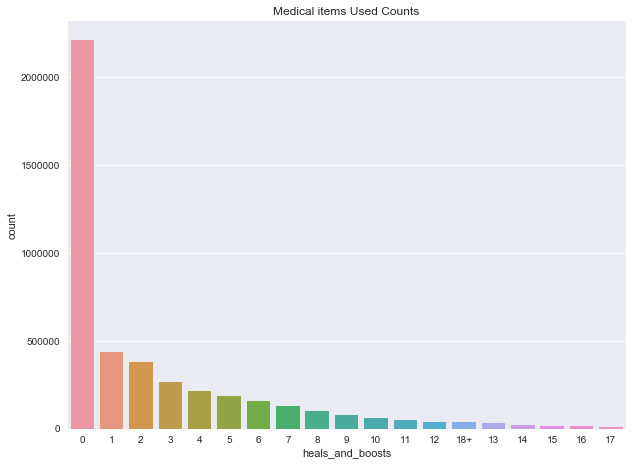

In [19]:
# since these two variables are both considered as medical items, let's sum them up and see their distribution
data_copy = data.copy()
data_copy['heals_and_boosts'] = data_copy['heals'] + data_copy['boosts']
data_copy.loc[data_copy['heals_and_boosts'] > data_copy['heals_and_boosts'].quantile(0.99)] = "18+"
plt.figure(figsize=(10,7.5))
sns.countplot(data_copy['heals_and_boosts'], order = data_copy['heals_and_boosts'].value_counts().index)
plt.title("Medical items Used Counts")
plt.show()

/Users/Zhaoyang/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


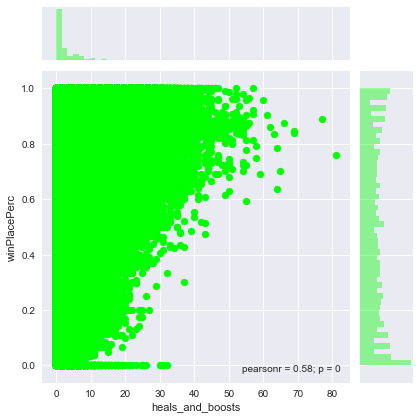

In [20]:
# check if there exists a positive relation between 'heals_and_boosts' and the target variable 'winPlacePerc'

data_copy = data.copy()
data_copy['heals_and_boosts'] = data_copy['heals'] + data_copy['boosts']
sns.jointplot(data_copy.heals_and_boosts, data_copy.winPlacePerc, color="lime")
plt.show()

In [21]:
# the plot shows that heals_and_boosts(number of medical items used) has a positive relationship to 
# the target variable

### 3). Distance Travelled

In [22]:
# now let's explore the three variables 'walkDistance', 'swimDistance' and 'rideDistance'
# usually a longer travelled distance leads to a longer survival time

# first, we look at the variable 'walkDistance'
walks_mean = data.walkDistance.mean()
walks_max = data.walkDistance.max()
walks_median = data.walkDistance.median()
walks_99_quantile = data.walkDistance.quantile(0.99)

print("The average walk distance is: {} meters".format(walks_mean))
print("The median walk distance  is: {} meters".format(walks_median))
print("The maximum walk distance is: {} meters".format(walks_max))
print("99% of the players have walk distance less than: {} meters".format(walks_99_quantile))

The average walk distance is: 1154.218118648076 meters
The median walk distance  is: 685.6 meters
The maximum walk distance is: 25780.0 meters
99% of the players have walk distance less than: 4396.0 meters


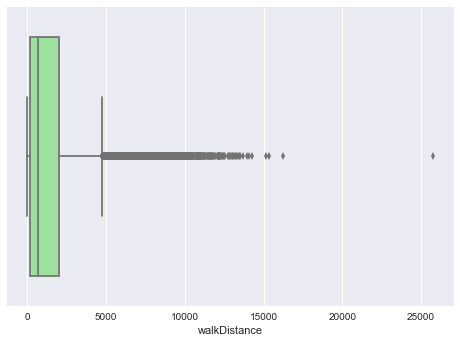

In [23]:
# make a box plot to see the distribution
sns.boxplot(data['walkDistance'], color = 'lightgreen')
plt.show()

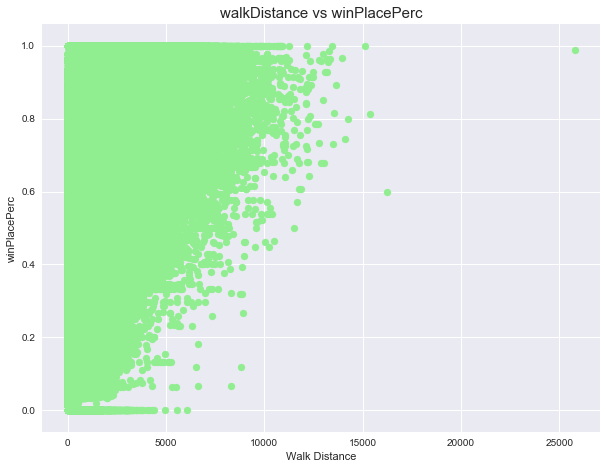

In [24]:
# use a scatter plot to show the relationship between walkDistance and winPlacePerc
plt.figure(figsize=(10,7.5))
plt.scatter(x = data['walkDistance'], y = data['winPlacePerc'], color='lightgreen')
plt.title("walkDistance vs winPlacePerc", fontsize=15)
plt.xlabel("Walk Distance")
plt.ylabel("winPlacePerc")
plt.show()

In [25]:
# secondly, let's look at the variable 'swimDistance'
swim_mean = data.swimDistance.mean()
swim_max = data.swimDistance.max()
swim_median = data.swimDistance.median()
swim_95_quantile = data.swimDistance.quantile(0.95)

print("The average swim distance is: {} meters".format(swim_mean))
print("The median swim distance  is: {} meters".format(swim_median))
print("The maximum swim distance is: {} meters".format(swim_max))
print("95% of the players have swim distance less than: {} meters".format(swim_95_quantile))

The average swim distance is: 4.509323465329768 meters
The median swim distance  is: 0.0 meters
The maximum swim distance is: 3823.0 meters
95% of the players have swim distance less than: 11.43 meters


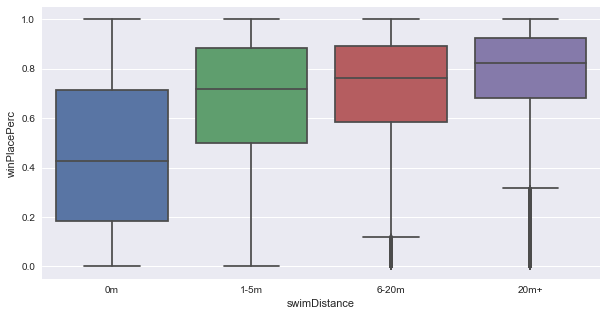

In [26]:
# it looks like most players do not swim too much

# let't check if it is correlated to the target variable
swim = data.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 3823], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(10,5))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim, order = ['0m', '1-5m', '6-20m', '20m+'])
plt.show()

In [27]:
# the boxplot shows that the more distance swum, the more likely a player has a higher winPlacePerc

# now let's look at the last one - 'rideDistance'
ride_mean = data.rideDistance.mean()
ride_max = data.rideDistance.max()
ride_median = data.rideDistance.median()
ride_99_quantile = data.rideDistance.quantile(0.99)

print("The average ride distance is: {} meters".format(ride_mean))
print("The median ride distance  is: {} meters".format(ride_median))
print("The maximum ride distance is: {} meters".format(ride_max))
print("99% of the players have ride distance less than: {} meters".format(ride_99_quantile))

The average ride distance is: 606.1158054527955 meters
The median ride distance  is: 0.0 meters
The maximum ride distance is: 40710.0 meters
99% of the players have ride distance less than: 6966.0 meters


/Users/Zhaoyang/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


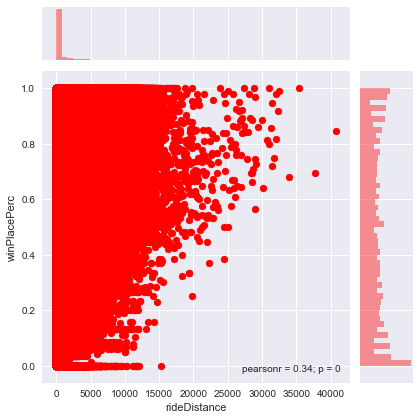

In [28]:
sns.jointplot(data.rideDistance, data.winPlacePerc, color = 'red')
plt.show()

In [29]:
# all of the three variables related to distance have a positive influence on the target varibale

## Feature Engineering

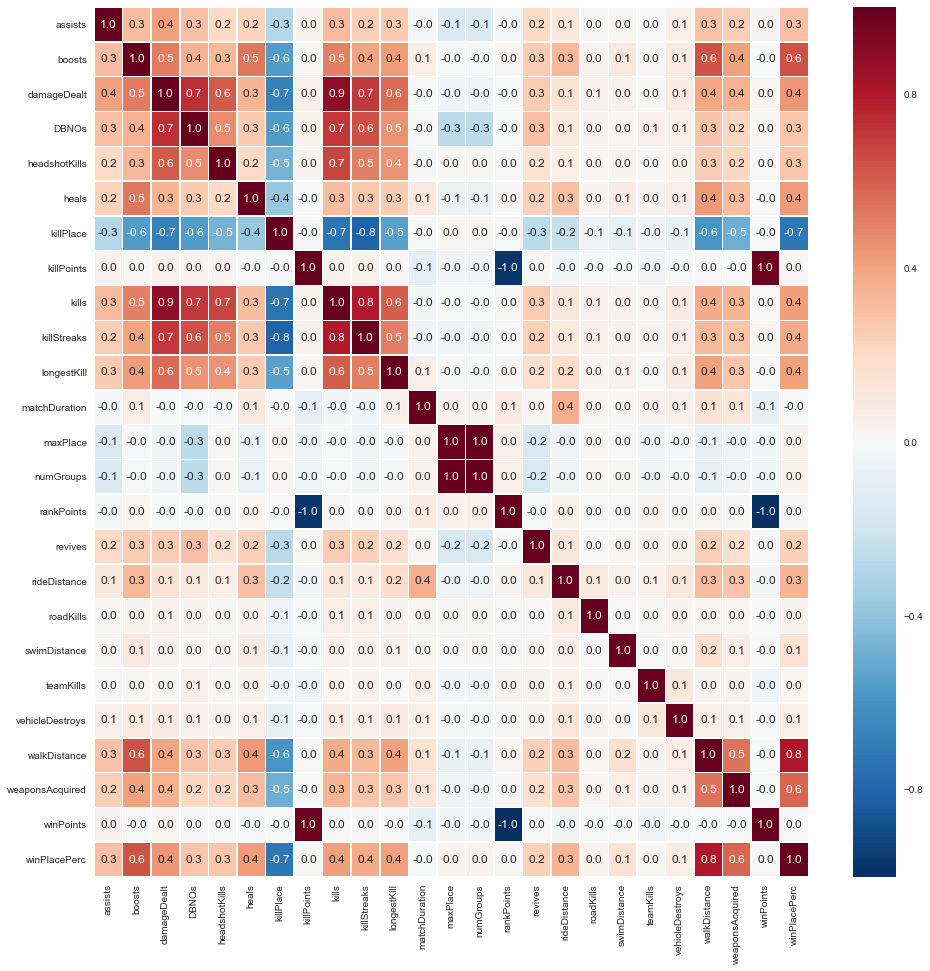

In [30]:
# first we will analyze the Pearson Correlation graph and find some highly correlated variables
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

### 1). Drop Some Columns 

In [31]:
# according the Pearson Correlation graph above, there are some variables 'killPoints', 'winPoints' and 'rankPoints'
# which have a 1-1 correlation, which means they are the same thing and droping one of them will not have effect on the result
data.drop(['winPoints', 'rankPoints'], axis = 1, inplace=True)
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,26,0,0.0000,0,0.00,0,0,244.80,1,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,25,0,0.0045,0,11.04,0,0,1434.00,5,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,47,0,0.0000,0,0.00,0,0,161.80,2,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,30,0,0.0000,0,0.00,0,0,202.70,3,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,95,0,0.0000,0,0.00,0,0,49.75,2,0.1875


In [32]:
# also, 'numGroups' and 'maxPlace' are the same thing, we will drop one of them.
data.drop(['maxPlace'], axis = 1, inplace=True)

### 2). Create New Features

In [33]:
# 'totalDistance'

# since all distance travelled have a positive impact on the target variable, we will create a new feature 
# called 'totalDistance'
data['totalDistance'] = data['walkDistance'] + data['swimDistance'] + data['rideDistance']

In [34]:
# we will build another feature to examine the outliers, by outliers it means players who have weird characteristic
# and could possibily be cheaters

# we will first examine players have totalDistance 0, but have kill > 0, also known as kills without movement
data['killsWithoutMoving'] = ((data['kills'] > 0) & (data['totalDistance'] == 0))
data[data['killsWithoutMoving'] == True].shape

(1535, 28)

In [35]:
# we will drop the cheaters in order to imporove our prediction
data.drop(data[data['killsWithoutMoving'] == True].index, inplace=True)
data[data['killsWithoutMoving'] == True].shape

(0, 28)

In [36]:
# and we drop the 'killsWithoutMoving' after we have found the cheaters
data.drop(['killsWithoutMoving'], axis = 1, inplace = True )

In [37]:
# 'healsAndBoosts'

# another new feature we will create is the 'healsAndBoosts'
data['healsAndBoosts'] = data['heals'] + data['boosts']

In [38]:
# 'headshotRate'

# the third important feature is headshot rate, it is the number of headshot divided by the total number of kills.
# headshot rate is a good indicator of profesional players
data['headshotRate'] = data['headshotKills'] / data['kills']
data['headshotRate'].fillna(0, inplace = True)

In [39]:
# next thing we will consider is the 100% headshot rate, players have many kills and 100% headshot rate could be cheaters
(data[(data['headshotRate'] == 1) & (data['kills'] >=10)]).shape

(24, 29)

In [40]:
# we will remove those potential cheaters
data.drop(data[(data['headshotRate'] == 1) & (data['kills'] >=10)].index, inplace=True)

In [41]:
(data[(data['headshotRate'] == 1) & (data['kills'] >=10)]).shape
# and they are gone

(0, 29)

In [42]:
# 'assistsKnockedKills'

# this variable is the sum of 'assists', 'DBNOs' and 'kills', it indicates how many enemy players a player have damaged
data['assistsKnockedKills'] = data['assists'] + data['DBNOs'] + data['kills']

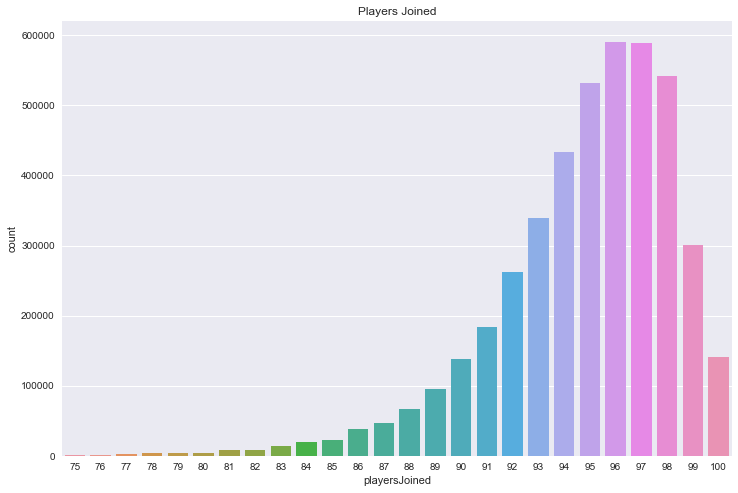

In [43]:
# 'playersJoined'

# if we know how many players are in the same match, we can normalize some important features
data['playersJoined'] = data.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(12,8))
sns.countplot(data[data['playersJoined']>=75]['playersJoined'])
plt.title('Players Joined')
plt.show()

# the plot shows almost all matchs are packed

In [44]:
# normalize the features 'kills', 'damageDealt'

data['killsNorm'] = data['kills']*((100-data['playersJoined'])/100 + 1)
data['damageDealtNorm'] = data['damageDealt']*((100-data['playersJoined'])/100 + 1)

In [45]:
# drop the old features 'kills' and 'damageDealt' after we have their normalization
data.drop(['kills', 'damageDealt'], axis =1, inplace=True)

In [48]:
# let's one hot encode the categorical variable 'matchType'

data = pd.get_dummies(data, columns=['matchType'])
# Take a look at the encoding
matchType_encoding = data.filter(regex='matchType')
matchType_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
# convert 'groupId' and 'matchId' into categorical type
data['groupId'] = data['groupId'].astype('category')
data['matchId'] = data['matchId'].astype('category')

# Get category coding for groupId and matchID
data['groupId_cat'] = data['groupId'].cat.codes
data['matchId_cat'] = data['matchId'].cat.codes

# Get rid of old 'Id' columns
data.drop(labels = ['groupId', 'matchId', 'Id'], axis = 1, inplace=True)

In [50]:
# our feature engineering part is done
data.head()

,assists,boosts,DBNOs,headshotKills,heals,killPlace,killPoints,killStreaks,longestKill,matchDuration,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
0,0,0,0,0,0,60,1241,0,0.00,1306,...,0,0,0,0,0,0,0,1,613687,30085
1,0,0,0,0,0,57,0,0,0.00,1777,...,0,0,0,0,0,0,0,1,827708,32751
2,1,0,0,0,0,47,0,0,0.00,1318,...,0,0,0,0,0,0,0,0,843401,3143
3,0,0,0,0,0,75,0,0,0.00,1436,...,0,0,0,0,0,0,0,1,1340272,45260
4,0,0,0,0,0,45,0,1,58.53,1424,...,0,0,0,0,0,1,0,0,1757609,20531


In [52]:
data.shape

(4445406, 45)

### Partition the dataset into trainning and test set

In [53]:
# Here, we chose 70% of our dataset as training set, and 30% of our dataset as testing set.
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != 'winPlacePerc'] #all columns except target
y = data['winPlacePerc'] # Only target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.3, 
                                                     random_state=0)

In [54]:
# shape of our train data
print('Train shape:{}'.format(X_train.shape))
print('Target shape:{}'.format(y_train.shape))

Train shape:(3111784, 44)
Target shape:(3111784,)


## Models

### First Random Forest Model

In [55]:
## we will build and implement a random forest model
from sklearn.ensemble import RandomForestRegressor

# train our first random forest model
rfr_1 = RandomForestRegressor(n_estimators=60, min_samples_leaf=4, max_features=0.5, n_jobs=-1)
rfr_1.fit(X_train, y_train)

/Users/Zhaoyang/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
# now let's take a look at how our model performed by checking the Mean Absolute Error
from sklearn.metrics import mean_absolute_error

score = mean_absolute_error(rfr_1.predict(X_train), y_train)
print("Mean Absolute Error is: {}".format(score))

Mean Absolute Error is: 0.033928063419654556


### Test The First Model

In [80]:
y_pred_1 = rfr_1.predict(X_test)
#print out the MAE value
score_test = mean_absolute_error(y_pred_1, y_test)
print("Mean Absolute Error is: {}".format(score_test))

Mean Absolute Error is: 0.05548596242011615


In [81]:
# result looks not bad
print("MAE train is {}, MAE test is {}".format(score, score_test))

MAE train is 0.033928063419654556, MAE test is 0.05548596242011615


### Model Optimization

In [57]:
# check the importances of the features
feature_importances = pd.DataFrame({'Feature':X_train.columns, 'Importance':rfr_1.feature_importances_}
                       ).sort_values('Importance', ascending=False)
feature_importances[:15]


,Feature,Importance
17,walkDistance,0.393620
5,killPlace,0.233236
19,totalDistance,0.174736
1,boosts,0.066654
20,healsAndBoosts,0.020023
9,matchDuration,0.015357
23,playersJoined,0.013718
10,numGroups,0.013616
18,weaponsAcquired,0.013365
24,killsNorm,0.010934


In [58]:
# select the significant features, features that have importances > 0.005
features_selected = feature_importances[feature_importances.Importance>0.005]
print('Significant features: ', len(features_selected))
features_selected

Significant features:  12


,Feature,Importance
17,walkDistance,0.393620
5,killPlace,0.233236
19,totalDistance,0.174736
1,boosts,0.066654
20,healsAndBoosts,0.020023
9,matchDuration,0.015357
23,playersJoined,0.013718
10,numGroups,0.013616
18,weaponsAcquired,0.013365
24,killsNorm,0.010934


In [59]:
# next we will build our second random forest model with our 12 significant features

### Second Random Forest Model

In [60]:
# use our 12 selected data as our train data
X_train_2 = X_train[features_selected['Feature']].copy()

rfr_2 = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
rfr_2.fit(X_train_2, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [61]:
score2 = mean_absolute_error(rfr_2.predict(X_train_2), y_train)
print("Mean Absolute Error is: {}".format(score2))

Mean Absolute Error is: 0.033445120284611204


### Test The Second Model

In [79]:
# test the second random forest model
y_pred = rfr_2.predict(X_test[features_selected['Feature']])
#print out the MAE value
score_3 = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error is: {}".format(score_3))

Mean Absolute Error is: 0.0565149285124814


In [82]:
print("MAE train is {}, MAE test is {}".format(score2, score_3))

MAE train is 0.033445120284611204, MAE test is 0.0565149285124814


In [86]:
# The result indicates that the second model has a smaller mean absolute error when predicting the trainning data, 
# while it didn't perform better the first model when applied to the test data. Therefore, the smallerst MAE error
# is 0.05548

## Conclusion
>* The best strategy to survive in the PUBG game is to avoid fighting. The result shows that walk distance contributes the most to the win placement percentage. The more distance a player walked directly results in a longer surviving time, which means the win placement percentage will go up. The ability to kill enemy players is the second most important factor. Whenever an enemy is eliminated, the player will be safer at the specific location. Boost item gives players the ability to heal and run faster. In conclusion, the three factors contribute the most to win a PUBG game. If a player has walked a long distance and managed to kill the enemies, there is a strong possibility that he or she could be the winner of the game.